In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

#Import libraries for multicollineaarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import libraries for transformations
import joblib



In [2]:
from SARIMAX import remove_multicollinear, calculate_vif
from datascript import load_data, split_data
import datascript
import os

SARIMAX for MINDANAO
DATA PREPROCESSING

In [3]:
#Import the necessary files
base_path = os.path.dirname(os.path.abspath(datascript.__file__))  # Gets the current working directory
complete_min_transformed = load_data("MIN", True)
complete_min_untransformed = load_data("MIN", False)


In [4]:
#Prepare exogenous variables and check for multicollinearity
full_transformed_exog = complete_min_transformed.drop(columns=['GWAP', 'LWAP'])
full_transformed_exog = full_transformed_exog.shift(1)
full_transformed_exog = full_transformed_exog.fillna(0)
full_exog_train, full_exog_test = split_data(full_transformed_exog, False)

transformed_exog = remove_multicollinear(full_transformed_exog, 10)
calculate_vif(transformed_exog)

Dropping Demand with VIF of 44.52406192653396
Dropping TMIN_Butuan with VIF of 36.707195837986
Dropping TMAX_General Santos with VIF of 36.07038828108667
Dropping TMIN_Dipolog with VIF of 34.339875345026364
Dropping TMAX_Surigao with VIF of 33.97999068809047
Dropping TMAX_Malaybalay with VIF of 31.880157909460152
Dropping TMIN_Davao City with VIF of 28.5405662736641
Dropping TMAX_Dipolog with VIF of 22.54870763093872
Dropping TMIN_Zamboanga with VIF of 17.906212605673506
Dropping TMIN_Surigao with VIF of 16.6439537730043
Dropping TMAX_Cotabato with VIF of 16.215463453948736
Dropping TMIN_Malaybalay with VIF of 14.712357554731895
Dropping TMAX_Zamboanga with VIF of 12.73391700905409
Dropping TMAX_Davao City with VIF of 10.223308197348159
Final VIF values:
                     feature       VIF
0                  FLOW_MIN  7.063944
1           Reserve_GWAP_Fr  3.079486
2           Reserve_GWAP_Ru  5.288850
3           Reserve_GWAP_Rd  3.851479
4           Reserve_GWAP_Dr  3.933232
5     

,feature,VIF
0,FLOW_MIN,7.063944
1,Reserve_GWAP_Fr,3.079486
2,Reserve_GWAP_Ru,5.288850
3,Reserve_GWAP_Rd,3.851479
4,Reserve_GWAP_Dr,3.933232
5,RAINFALL_Davao City,1.965679
6,RAINFALL_Surigao,3.632740
7,RAINFALL_Zamboanga,1.910647
8,RAINFALL_Dipolog,2.630585
9,RAINFALL_Butuan,3.070749


In [5]:
#Prepare the necessary datasets
#Target Variables
train_data, test_data = split_data(complete_min_transformed, False)
GWAP_train = train_data['GWAP']
GWAP_test = test_data['GWAP']
LWAP_train = train_data['LWAP']
LWAP_test = test_data['LWAP']

#Exogenous Variables
exog_train, exog_test = split_data(transformed_exog, False)

#Untransformed variables for verification 
untransformed_train_data, untransformed_test_data = split_data(complete_min_untransformed, False)
untransformed_GWAP_test = untransformed_test_data['GWAP']
untransformed_LWAP_test = untransformed_test_data['LWAP']



In [6]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Mindanao GWAP")
lwap_plot.update_layout(title=f"Mindanao LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

Differencing

In [7]:
%run SARIMAX.py

#Checking for stationarity in GWAP data
GWAP_train = perform_differencing(GWAP_train)
LWAP_train = perform_differencing(LWAP_train)

#Perform differencing on train exogenous data
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

#Perform differencing on test exogenous data
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:57: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:57: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_MIN' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Ru' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Davao City' is stationary after differencing 0 times.
Column 'RAINFALL_Surigao' is stationary after differencing 1 times.
Column 'RAINFALL_Zamboanga' is stationary after differencing 1 times.
Column 'RAINFALL_Dipolog' is stationary after differencing 1 times.
Column 'RAINFALL_Butuan' could not be made stationary after 3 differencing operations.
Column 'TMAX_Butuan' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\S

Column 'RAINFALL_Malaybalay' is stationary after differencing 1 times.
Column 'RAINFALL_General Santos' is stationary after differencing 0 times.
Column 'TMIN_General Santos' is stationary after differencing 1 times.
Column 'RAINFALL_Cotabato' is stationary after differencing 0 times.
Column 'TMIN_Cotabato' could not be made stationary after 3 differencing operations.
Column 'FLOW_MIN' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Ru' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Davao City' is stationary after differencing 0 times.
Column 'RAINFALL_Surigao' is stationary after differencing 2 times.
Column 'RAINFALL_Zamboanga' is stationary after differencing 0 times.
Column 'RAINFALL_Dipolog' is stationary after differencing 0 times.
Column 'RAINFALL_Butuan'

C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-06)\SARIMAX.py:85: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Order Specification

The ACF for GWAP is seen below
The PACF for GWAP is seen below


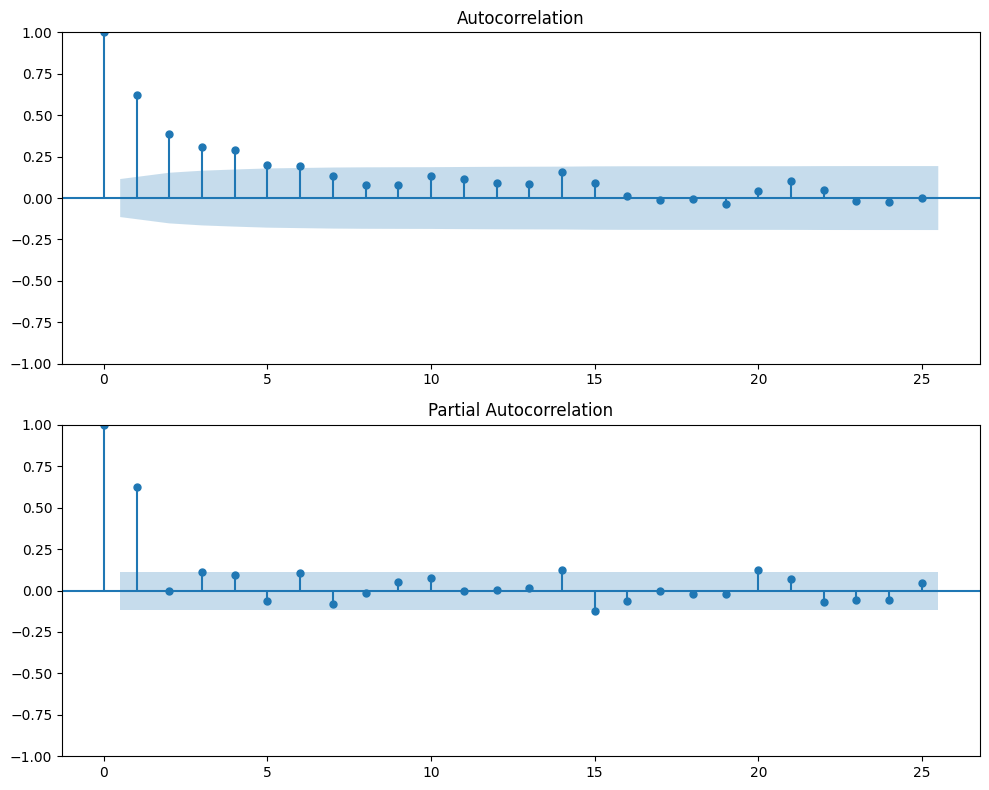

The ACF for LWAP is seen below
The PACF for LWAP is seen below


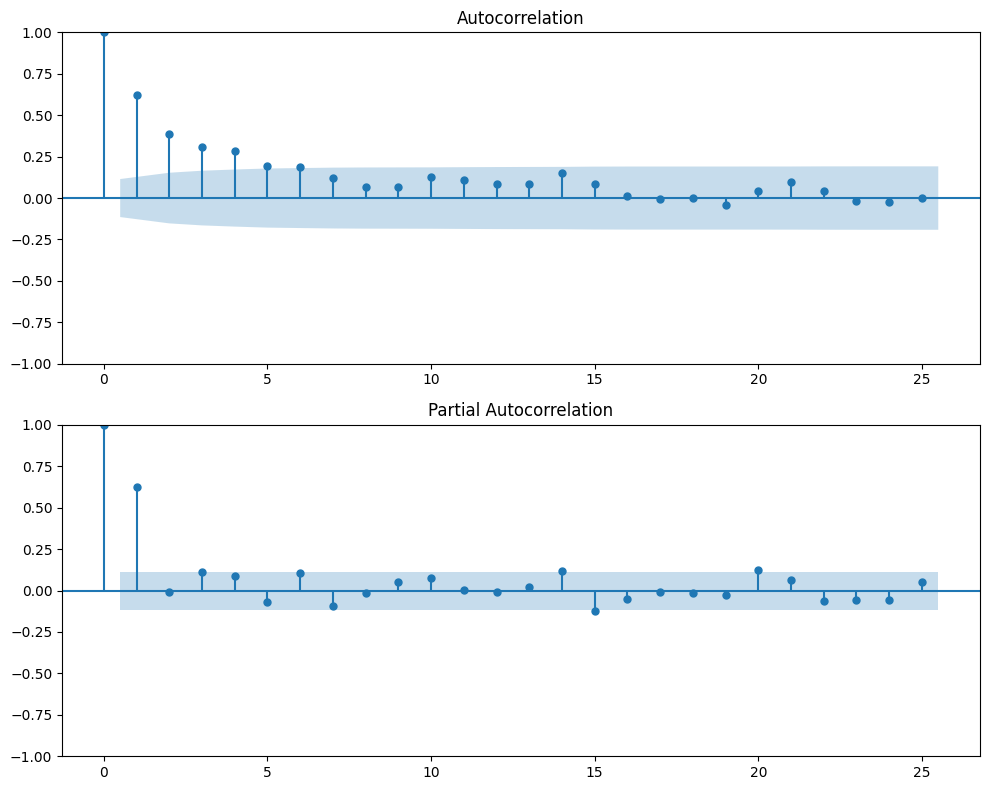

In [8]:
%run SARIMAX.py

plot_orders(GWAP_train, lags=25, alpha=0.05, var='GWAP')
plot_orders(LWAP_train, lags=25, alpha=0.05, var='LWAP')

GWAP and LWAP Forecasting

In [34]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=13, exog_data=diff_exog_train )

#Display results of previous function
GWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 6 and an AIC of -1070.7818442949656


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 1, 6), suppress_warnings=True)

In [17]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=diff_exog_train )

#Display results of previous function
LWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -1030.783221940742


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(1, 0, 0, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.947995
         Iterations: 18
         Function evaluations: 3400
                                      SARIMAX Results                                      
Dep. Variable:                                GWAP   No. Observations:                  292
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                 276.815
Date:                             Thu, 06 Mar 2025   AIC                           -511.629
Time:                                     15:46:09   BIC                           -434.417
Sample:                                 01-01-2023   HQIC                          -480.701
                                      - 10-19-2023                                         
Covariance Type:                               opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Optimization terminated successfully.
         Current function value: -0.949340
         Iterations: 18
         Function evaluations: 3455
                                      SARIMAX Results                                      
Dep. Variable:                                LWAP   No. Observations:                  292
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 7)   Log Likelihood                 277.207
Date:                             Thu, 06 Mar 2025   AIC                           -512.415
Time:                                     15:47:08   BIC                           -435.203
Sample:                                 01-01-2023   HQIC                          -481.487
                                      - 10-19-2023                                         
Covariance Type:                               opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

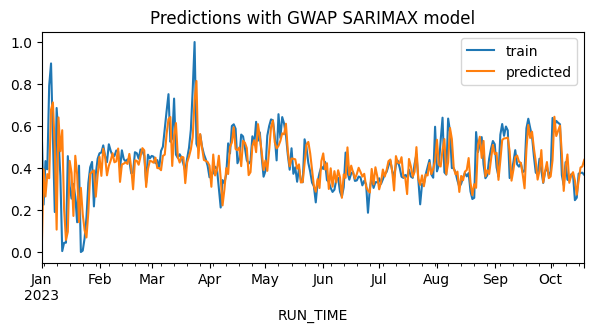

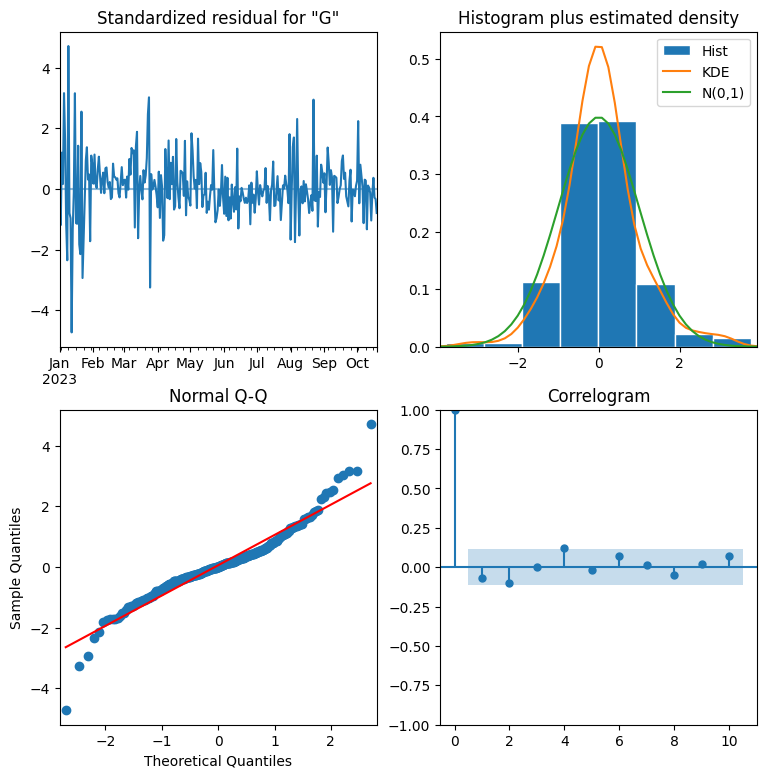

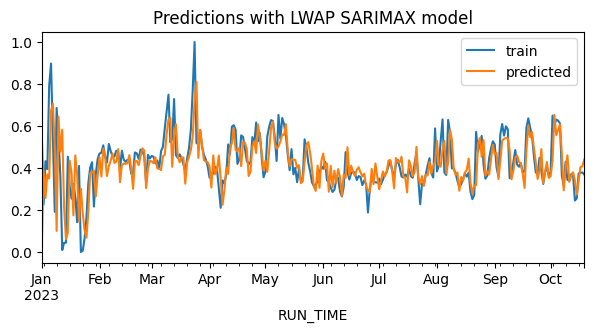

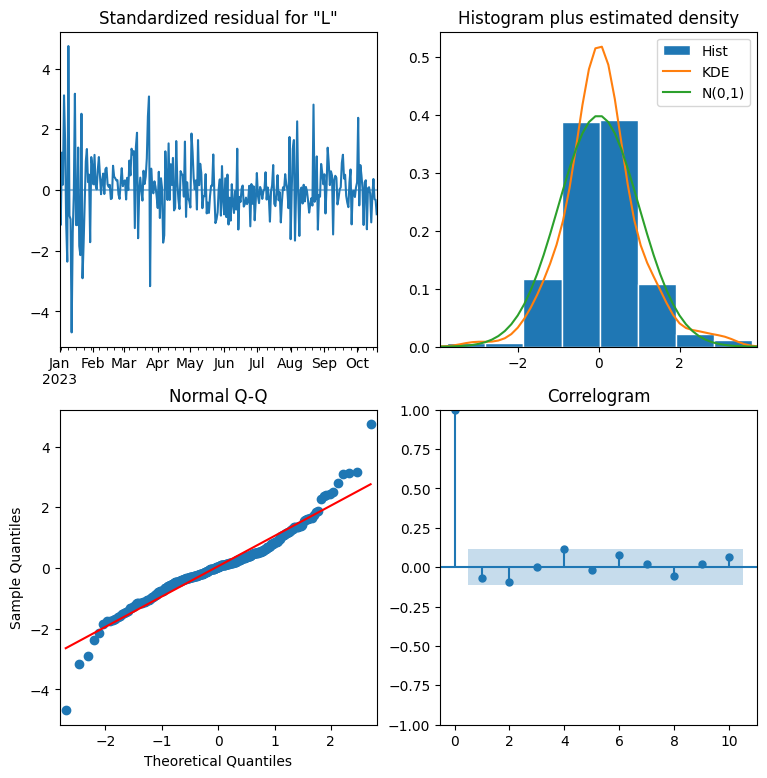

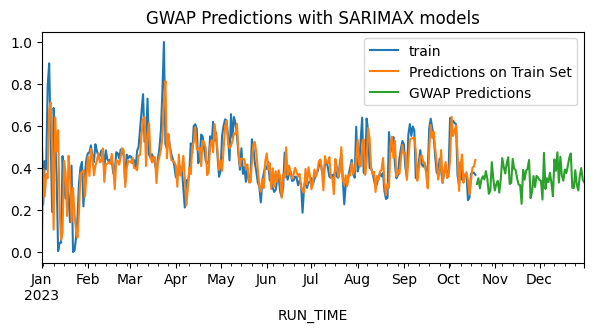

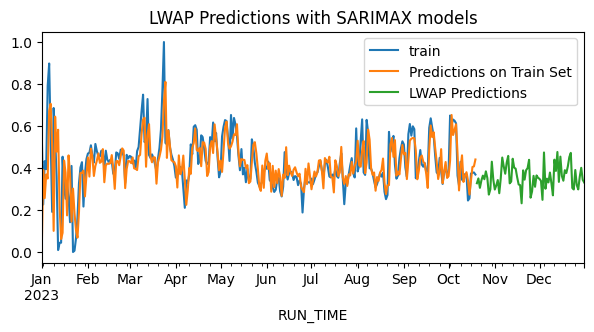

In [10]:
#Optimized orders for GWAP are (1,0,0)(2,0,1,7) and for LWAP are (1,0,0)(2,0,1)(7)
#This function fits the model and plots predictions on the train set; shows the summary of results and residuals diagnostics; and predicts on train set
%run SARIMAX.py

gwap_predictions, lwap_predictions, gwap_train_predict, lwap_train_predict = fit_SARIMAX(gwap_endog=GWAP_train, lwap_endog= LWAP_train, train_exog=diff_exog_train, gwap_order=(1,0,0), gwap_seasonal_order=(2,0,1,7), lwap_order = (1,0,0), lwap_seasonal_order=(2,0,1,7), GWAP_test=GWAP_test, LWAP_test=LWAP_test, exog_test = diff_exog_test)


Applying inverse transformations

In [11]:
%run transformscript.py
gwap_predictions = pd.DataFrame(gwap_predictions)
gwap_predictions = gwap_predictions.rename(columns={'predicted_mean':'GWAP'})
lwap_predictions = pd.DataFrame(lwap_predictions)
lwap_predictions = lwap_predictions.rename(columns={'predicted_mean':'LWAP'})
final_test = pd.concat([gwap_predictions, lwap_predictions, full_exog_test], axis=1)
inverse_test = inverse_transform_data(final_test, 'MIN')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



In [13]:
GWAP_predictions_inverse = inverse_test['GWAP']
LWAP_predictions_inverse = inverse_test['LWAP']

GWAP = complete_min_untransformed['GWAP']
LWAP = complete_min_untransformed['LWAP']


Mean Absolute Error (MAE) on Test Set for GWAP: 705.8474852821109
Root Mean Squared Error (RMSE) on Test Set for GWAP: 945.4656300274089
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 19.34922245993266


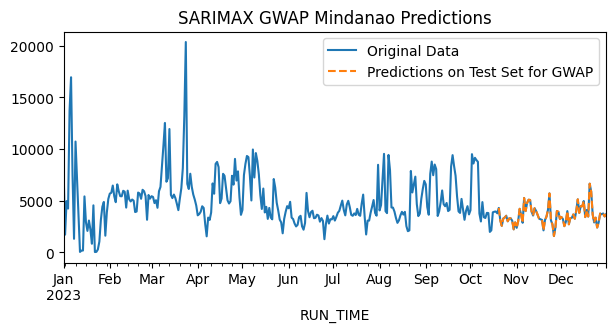

Mean Absolute Error (MAE) on Test Set for LWAP: 744.1226360827645
Root Mean Squared Error (RMSE) on Test Set for LWAP: 1005.7367262682698
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 21.001385132044916


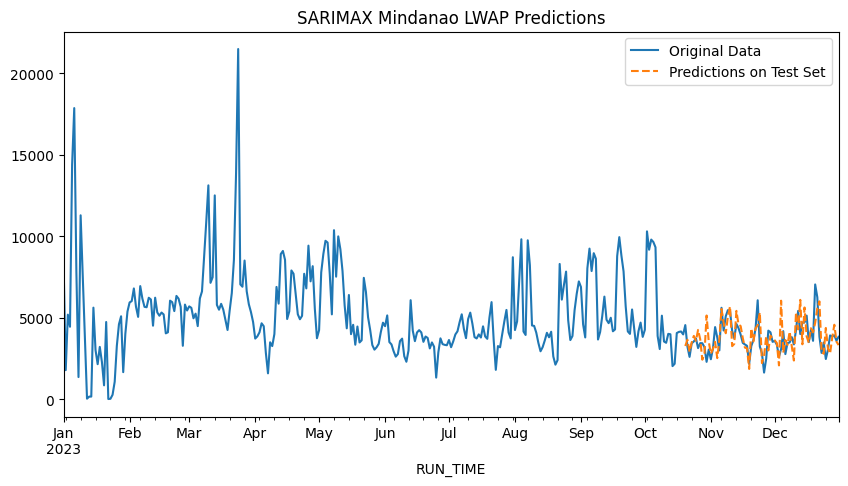

In [14]:
%run SARIMAX.py
evaluate_models(GWAP, LWAP, GWAP_predictions_inverse, untransformed_GWAP_test, untransformed_LWAP_test, LWAP_predictions_inverse, Region='Mindanao')

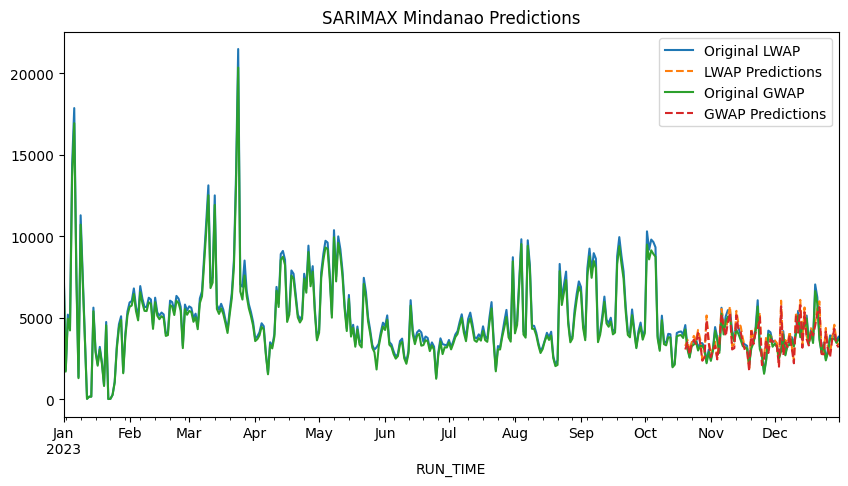

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Mindanao Predictions')
ax.legend()
plt.show()

In [ ]:
GWAP_predictions_inverse.to_csv('min-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('min-lwap-predictions.csv', index=False)